In [1]:
from sklearn import preprocessing

from dataset import *
from models.base_model import *
from models.neural_net import *
from models.sampled_net import *
from viewer.visualizer import *
from logic import *
import dataset
import models.base_model
import models.neural_net
import models.sampled_net
import viewer.visualizer
import logic

import importlib
from sklearn.pipeline import Pipeline
from swimnetworks import Dense, Linear

importlib.reload(dataset)
importlib.reload(models.base_model)
importlib.reload(models.neural_net)
importlib.reload(models.sampled_net)
importlib.reload(viewer.visualizer)
importlib.reload(logic)

<module 'logic' from 'c:\\Users\\daydo\\OneDrive\\Dokumente\\temp-sampled\\sampled-networks\\logic.py'>

In [12]:
xd = 2  # Input space dimensions
yd = 4  # Output dimension
num_samples = 40  # Number of data points
layer_width = 20

dataset = Dataset()
dataset.create_dataset_sinus_2d(num_samples)
dataset.scale(preprocessing.MinMaxScaler(feature_range=(-1, 1)))
dataset.split_train_test(0.2)

In [9]:
steps = [
    (
        "dense",
        Dense(
            layer_width=layer_width,
            activation="relu",
            parameter_sampler="relu",
            random_seed=42,
        ),
    ),
    ("linear", Linear(regularization_scale=1e-10)),
]
model_swim = Pipeline(steps)

model_swim.fit(dataset.X_train, dataset.y_train)

model_base = BaseModel()

model_base.weights = [
    model_swim.get_params()["steps"][0][1].weights,
    model_swim.get_params()["steps"][1][1].weights,
]
model_base.biases = [
    -model_swim.get_params()["steps"][0][1].biases[0],
    -model_swim.get_params()["steps"][1][1].biases[0],
]


y_predict = model_base.predict(dataset.X_test)
y_swim = model_swim.predict(dataset.X_test)

print(f"Predictions from 'model_base' and 'model_swim' are equal: {np.array_equal(y_predict, y_swim)}")

Predictions from 'model_base' and 'model_swim' are equal: True


In [13]:
model_adam = NeuralNet()
model_adam.fit(dataset.X_train, dataset.y_train, [layer_width], epochs=20)

model_base = model_adam

Layer1 sampling: 100%|██████████| 20/20 [00:00<00:00, 3332.52it/s]


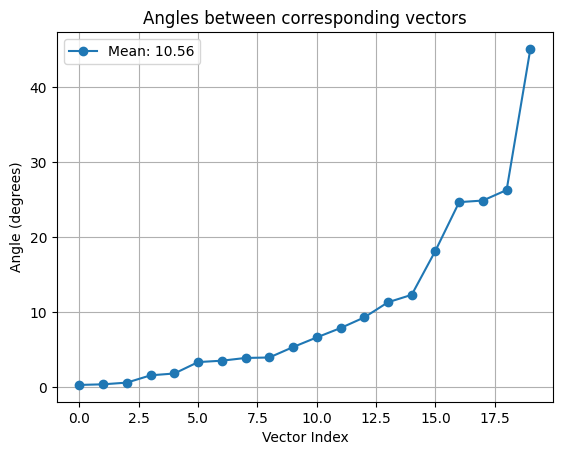

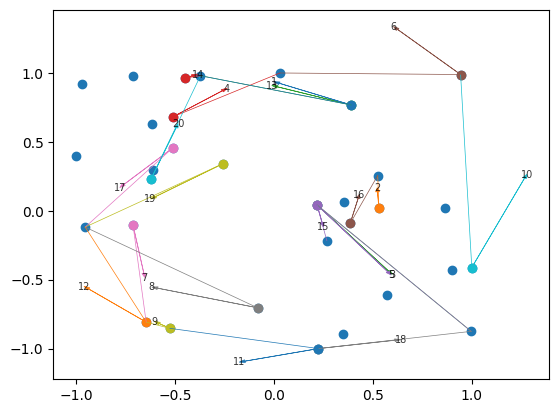

In [14]:
weights_l1, biases_l1, x_1_x2_tuples = compute_weights_biases_layer1(
    dataset.X_train, model_base.weights, model_base.biases
)

plot_vector_differences([weights_l1], [model_base.weights[0]])

plot_weight_vectors_and_point_pairs(dataset.X_train, x_1_x2_tuples, np.transpose(model_base.weights[0]))

Final Validation Loss: 0.0720


Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 7135.05it/s]


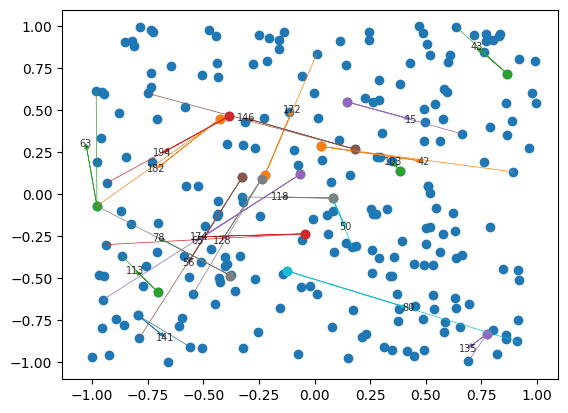

Final Validation Loss: 0.0462


Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 6890.20it/s]


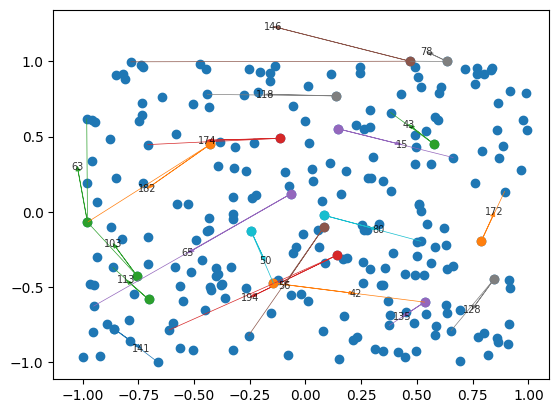

Final Validation Loss: 0.0324


Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 7134.08it/s]


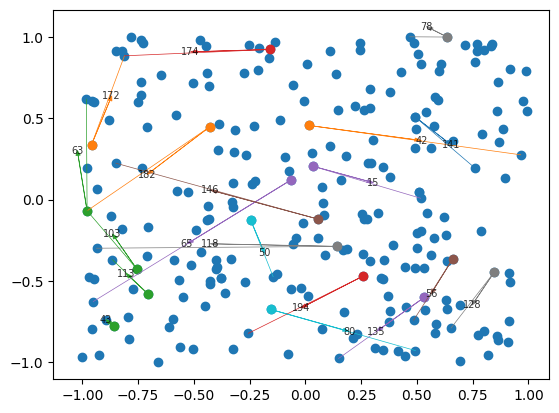

Final Validation Loss: 0.0209


Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 7011.95it/s]


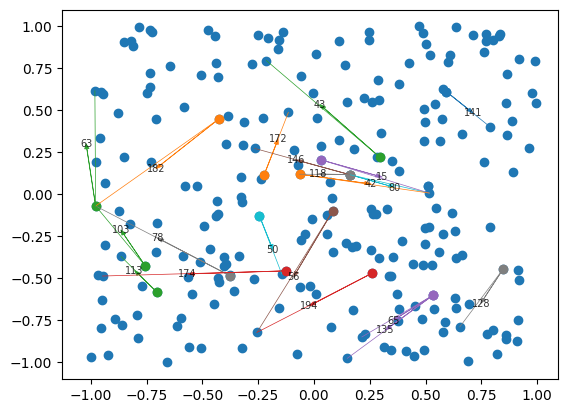

Final Validation Loss: 0.0167


Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 6672.72it/s]


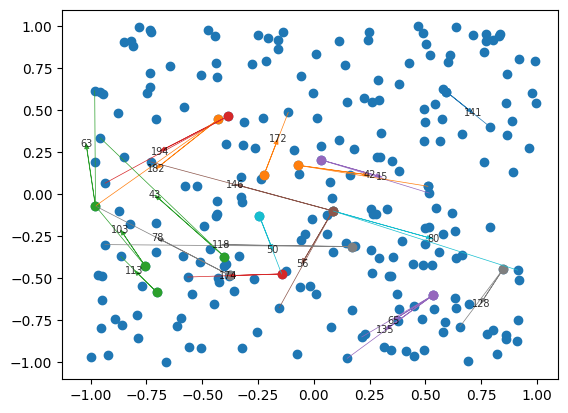

Final Validation Loss: 0.0136


Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 6243.01it/s]


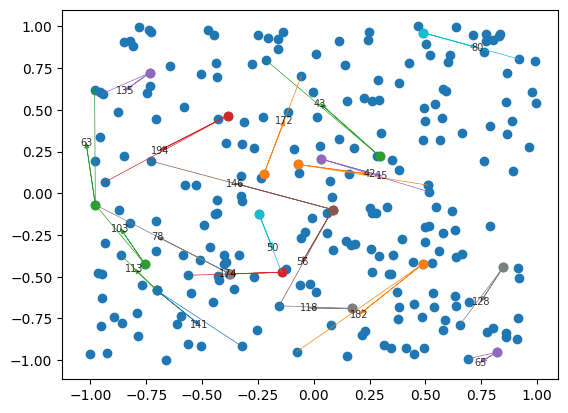

Final Validation Loss: 0.0113


Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 7142.04it/s]


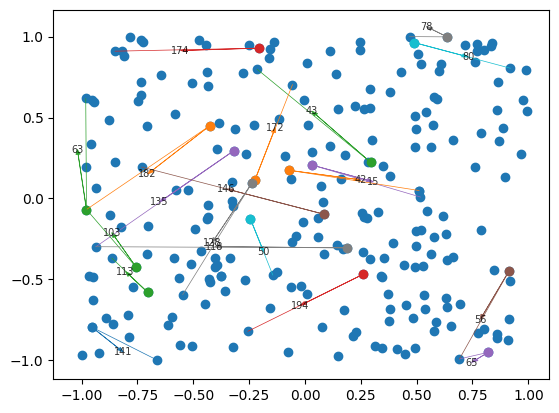

Final Validation Loss: 0.0097


Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 4613.18it/s]


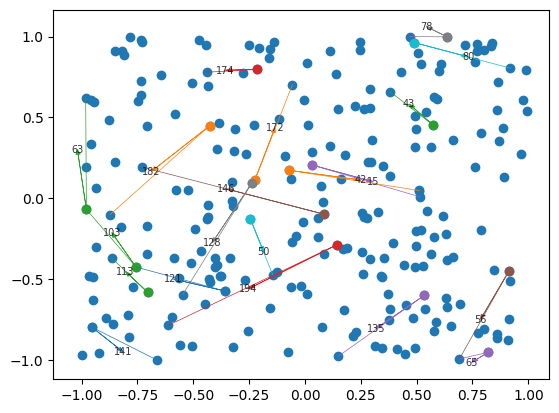

Final Validation Loss: 0.0087


Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 5909.01it/s]


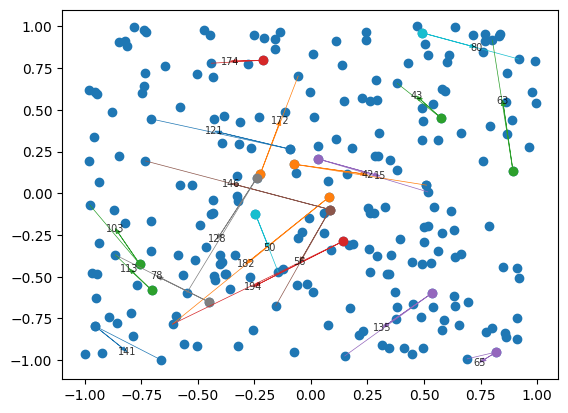

Final Validation Loss: 0.0078


Layer1 sampling: 100%|██████████| 200/200 [00:00<00:00, 5876.89it/s]


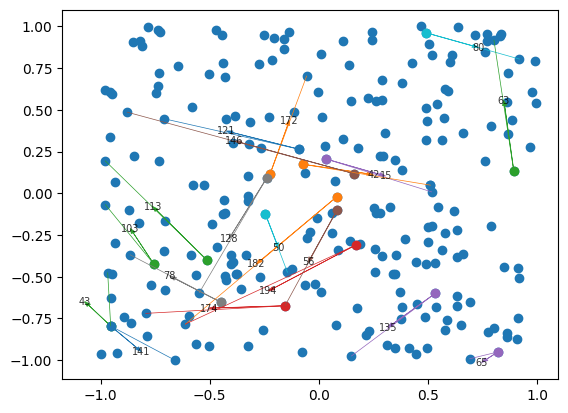

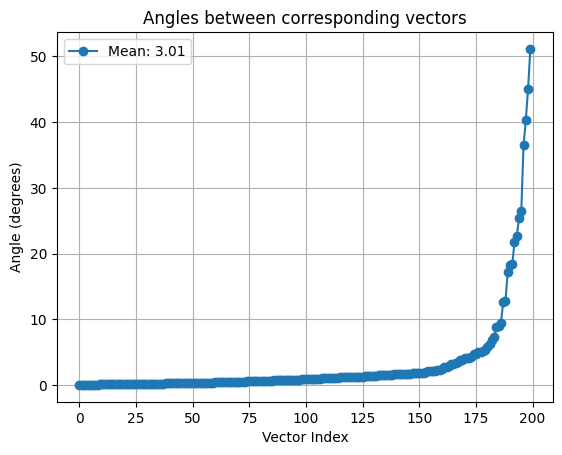

In [6]:
xd = 2  # Input space dimensions
num_samples = 300  # Number of data points
layer_width = 200

dataset = Dataset().create_dataset_sinus_2d(num_samples)
dataset.scale(preprocessing.MinMaxScaler(feature_range=(-1, 1)))
dataset.split_train_test(0.2)

model = NeuralNet()

initial_epochs = 20
d_epochs = 20
model.fit(dataset.X_train, dataset.y_train, layers=[layer_width], epochs=initial_epochs, validation_split=0.3)
x = model.model.evaluate(dataset.X_test, dataset.y_test, verbose=0)

# Initial training
for i in range(10):
    model.resume_training(
        dataset.X_train,
        dataset.y_train,
        initial_epoch=initial_epochs,
        epochs=initial_epochs + d_epochs,
        validation_split=0.2,
    )

    # Evaluate the model after additional training
    x = model.model.evaluate(dataset.X_test, dataset.y_test, verbose=0)

    print(f"Final Validation Loss: {x:.4f}")
    weights_l1, biases_l1, x_1_x2_tuples = compute_weights_biases_layer1(
        dataset.X_train, model.weights, model.biases, radius=0.0
    )

    # plot_vector_differences([weights_l1], [model.weights[0]])

    plot_weight_vectors_and_point_pairs(
        dataset.X_train, x_1_x2_tuples, np.transpose(model.weights[0]), num_vectors=20
    )
    initial_epochs += d_epochs

plot_vector_differences([model.weights[0]], [weights_l1])